# Creating data to view and fit

In [1]:
import tensorflow as tf

print(tf.__version__)

2.12.0


In [2]:
import datetime

print(f"notebook last run (end-to-end): {datetime.datetime.now()}")

notebook last run (end-to-end): 2023-07-07 15:26:11.856248


In [3]:
# importing dataset

from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [4]:
# we've created some data. looking at features (x) and labels (y)

x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [6]:
# make dataframe features and labels
import pandas as pd

circles = pd.DataFrame({"x0": x[:, 0], "x1": x[:, 1], "label": y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [7]:
# what kind of labels are we dealing with?

# check out different labels
circles.label.value_counts()

# 0 ve 1. binary classification

label
1    500
0    500
Name: count, dtype: int64

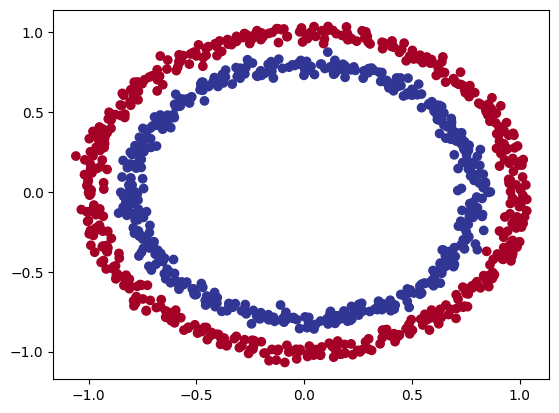

In [8]:
# visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

---
# Input and output shapes

In [9]:
# the shape of input data and the shape of output data must be equal

x.shape, y.shape

((1000, 2), (1000,))

In [10]:
# check how many samples we have

len(x), len(y)

(1000, 1000)

In [11]:
# view the first example of features and labels

x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

---
# Steps in modelling

In TensorFlow, there are typically 3 fundamental steps to creating and training a model
1. **Creating a model**: piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning)
2. **Compiling a model**: defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer) 
3. **Fitting a model**: letting the model trying to find patterns in the data (how does 'x' get to 'y')

In [12]:
tf.random.set_seed(42)

# 1. create the model using sequential api
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. compile the model
model_1.compile(
    # binary since we are working with 2 classes (0 and 1)
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"],
)

# 3. fit the model
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 762us/step - loss: 5.9831 - accuracy: 0.4900
Epoch 2/5
32/32 [==============================] - 0s 674us/step - loss: 6.1043 - accuracy: 0.4840
Epoch 3/5
32/32 [==============================] - 0s 652us/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 635us/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 658us/step - loss: 7.6246 - accuracy: 0.5000


In [13]:
# train our model for longer (more chances to look at the data)
# set verbose=0 to remove training updates
model_1.fit(x, y, epochs=100, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 663us/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

Even after 100 passes of the data, it's still performing as if it's guessing.

In [14]:
tf.random.set_seed(42)

# 1. create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(1), tf.keras.layers.Dense(1)]  # add an extra layer
)

# 2. compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"],
)

# 3. fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [15]:
# evaluate the model
model_2.evaluate(x, y)

32/32 [==============================] - 0s 616us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Still not even as good as guessing (~50% accuracy)

Let's remind ourselves of a couple more ways we can use to improve our models.

---
# Improving a model

To improve our model, we can alter almost every part of the 3 steps we went through before.

1. **Creating a model:** here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

2. **Compilin a model:** you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.

3. **Fitting a model:** perhaps you could fit a model for more epochs (leave it training for longer).


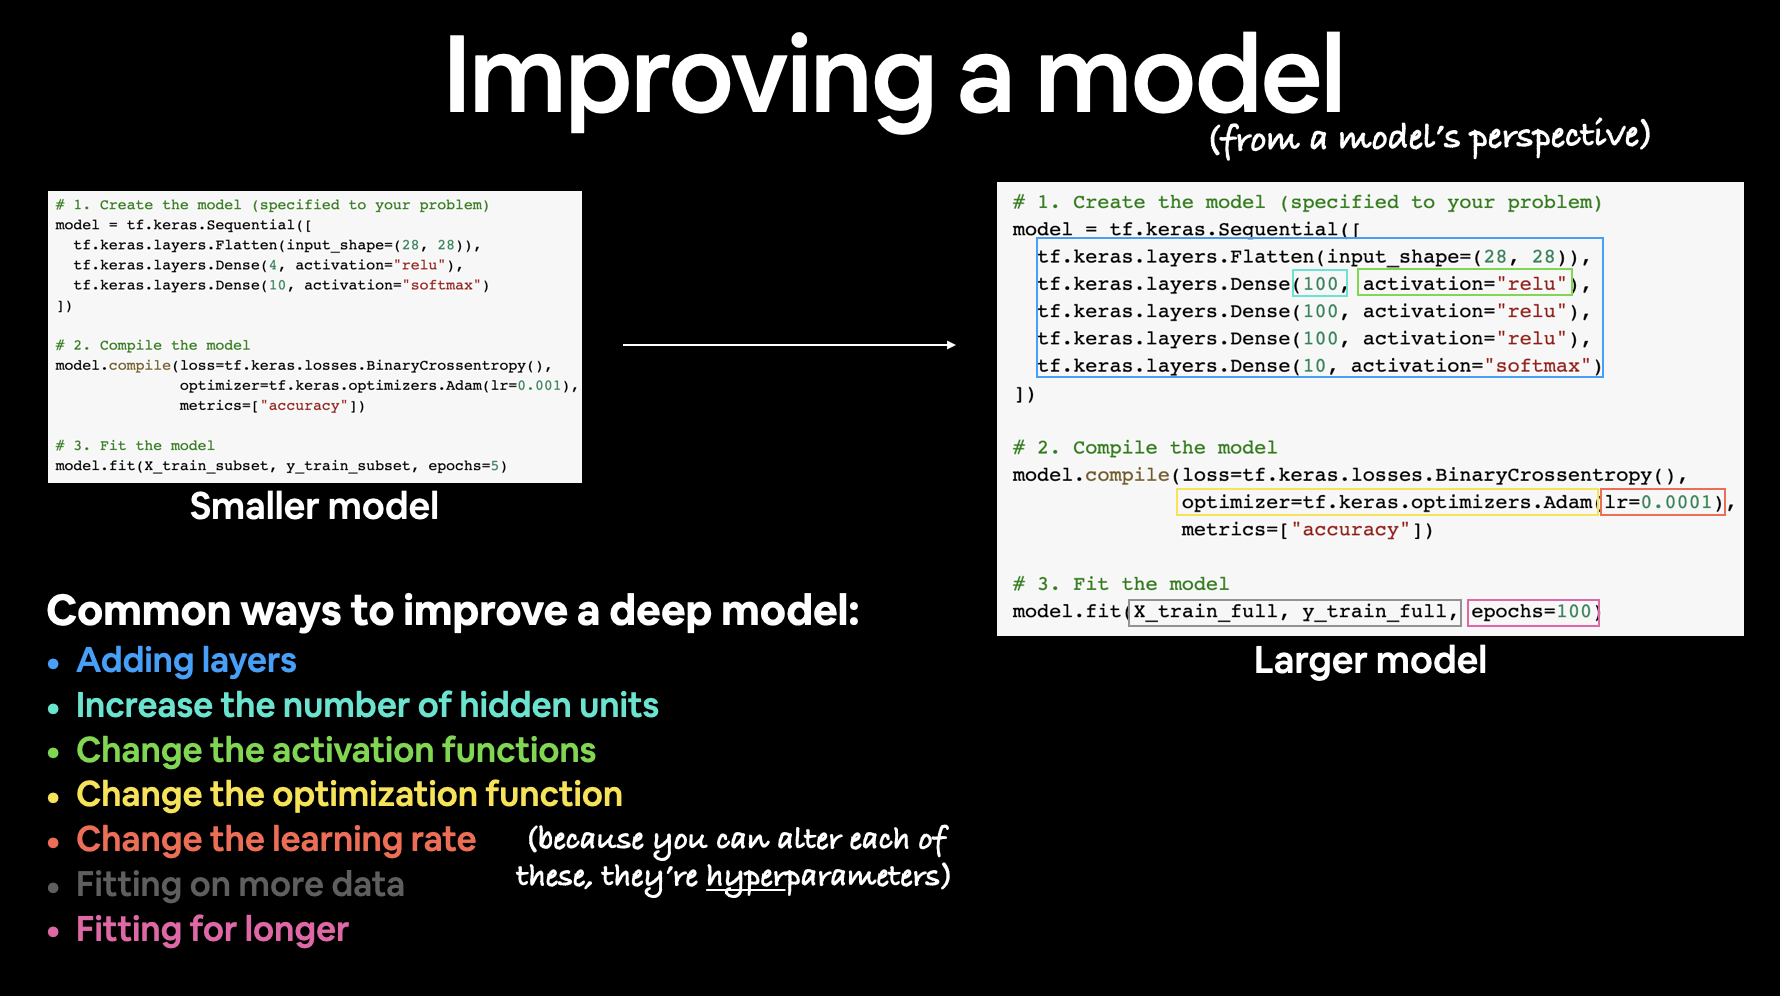

How about we try adding more neurons, an extra layer and our friend the Adam optimizer?

In [16]:
tf.random.set_seed(42)

# 1. create the model (this time 3 layers)
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),  # add 100 dense neurons
        tf.keras.layers.Dense(10),  # add another layer with 10 neurons
        tf.keras.layers.Dense(1),
    ]
)

# 2. compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),  # use Adam instead of SGD
    metrics=["accuracy"],
)

# 3. fit the model
model_3.fit(x, y, epochs=100, verbose=1)  # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 0s 838us/step - loss: 2.0696 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 755us/step - loss: 0.7327 - accuracy: 0.4530
Epoch 3/100
32/32 [==============================] - 0s 726us/step - loss: 0.7095 - accuracy: 0.4430
Epoch 4/100
32/32 [==============================] - 0s 719us/step - loss: 0.6987 - accuracy: 0.4480
Epoch 5/100
32/32 [==============================] - 0s 717us/step - loss: 0.6954 - accuracy: 0.4310
Epoch 6/100
32/32 [==============================] - 0s 751us/step - loss: 0.6938 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 700us/step - loss: 0.6940 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 702us/step - loss: 0.6946 - accuracy: 0.4920
Epoch 9/100
32/32 [==============================] - 0s 734us/step - loss: 0.6950 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 754us/step - loss: 0.6943 - accura

Let's make some visualizations to see what's happening.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

+ Takes in a trained model, features (X) and labels (y).
+ Creates a meshgrid (ag izgarasi?) of the different X values.
+ Makes predictions across the meshgrid.
+ Plots the predictions as well as a line between the different zones (where each unique class falls).


In [17]:
import numpy as np


def plot_decision_boundary(model, X, y):
    # define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # create X values (we're going to predict on all of these)
    # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # make predictions using the trained model
    y_pred = model.predict(x_in)

    # check for multi-class
    # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    if model.output_shape[-1] > 1:
        print("doing multiclass classification...")
        # we have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 466us/step
doing binary classifcation...


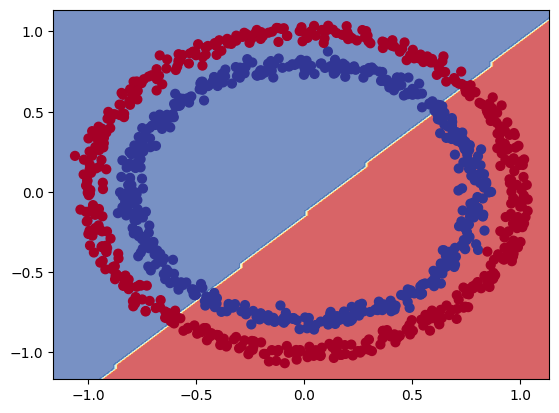

In [18]:
# check out the predictions our model is making
plot_decision_boundary(model_3, x, y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.

In [19]:
tf.random.set_seed(42)

# create some regression data
x_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# split it into training and test sets
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit our model to the data
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

# !!!!!!!!!!! BILINCLI ALINMIS HATA, GORMEZDEN GEL

Epoch 1/100


ValueError: in user code:

    File "c:\Users\asdes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\asdes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\asdes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\asdes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\asdes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\asdes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________



Oh wait... we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.

In [21]:
tf.random.set_seed(42)

# recreate the model
model_3 = tf.keras.Sequential(
    [tf.keras.layers.Dense(100), tf.keras.layers.Dense(
        10), tf.keras.layers.Dense(1)]
)

# change the loss and metrics of our compiled model
model_3.compile(
    loss=tf.keras.losses.mae,  # change the loss function to be regression-specific
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"],
)  # change the metric to be regression-specific

# fit the recompiled model
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


5/5 [==============================] - 0s 2ms/step - loss: 513.7644 - mae: 513.7644
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 431.9554 - mae: 431.9554
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 352.7831 - mae: 352.7831
Epoch 4/100
5/5 [==============================] - 0s 996us/step - loss: 269.1482 - mae: 269.1482
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 179.8052 - mae: 179.8052
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 80.9589 - mae: 80.9589
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 60.3520 - mae: 60.3520
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 77.1090 - mae: 77.1090
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 60.6876 - mae: 60.6876
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 44.9563 - mae: 44.9563
Epoch 11/100
5/5 [==============================] - 0s 997u

It seems like our model is learning something (the mae value trends down with each epoch), let's plot its predictions.

2/2 [==============================] - 0s 1ms/step


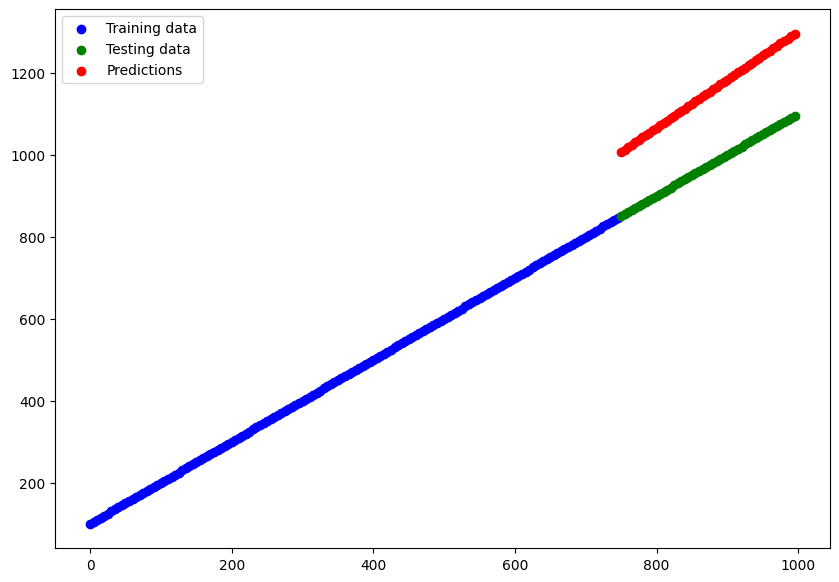

In [22]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(x_reg_test, y_reg_preds.squeeze(), c="r", label="Predictions")
plt.legend()

Okay, the predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something...

There must be something we're missing out on for our classification problem.

---
# The missing piece: Non-linearity

We saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.

We're going to replicate the neural network you can see at this link: [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle%C2%AEDataset=reg-plane&learningRate=0.01%C2%AEularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false%C2%AEularizationRate_hide=true&discretize_hide=true%C2%AEularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true)

+ The main change we'll add to models we've built before is the use of the activation keyword.

In [23]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    # 1 hidden layer with linear activation
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)  # output layer
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(
                    learning_rate=0.001),  # default = 0.001
                metrics=['accuracy']
                )

model_4.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 832us/step - loss: 6.2433 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 701us/step - loss: 6.2141 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 686us/step - loss: 6.1965 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 671us/step - loss: 6.1911 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 668us/step - loss: 6.1800 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 696us/step - loss: 6.1783 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 722us/step - loss: 6.1686 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 719us/step - loss: 6.1549 - accuracy: 0.4890
Epoch 9/100
32/32 [==============================] - 0s 682us/step - loss: 6.1338 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 723us/step - loss: 6.1219 - accura

Our model performs a little worse than guessing.

Let's remind ourselves what our data looks like

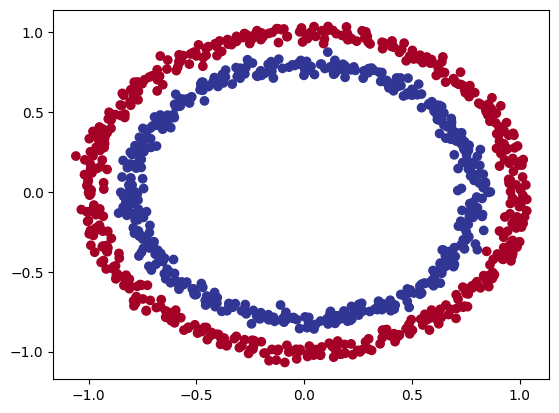

In [24]:
# check our data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

And let's see how our moel is making predictions on it.

313/313 [==============================] - 0s 504us/step
doing binary classifcation...


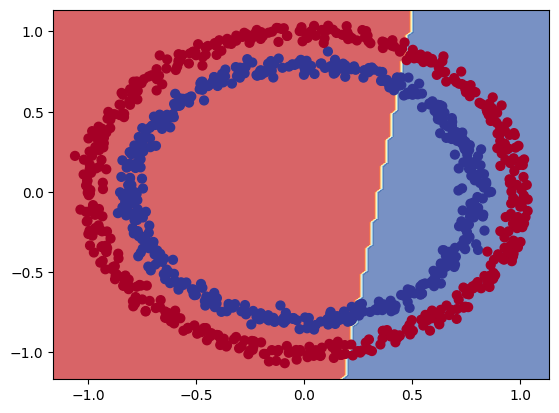

In [25]:
# check the decision boundary (blue is blue class, yellow is crossover, red is red class)
plot_decision_boundary(model_4, x, y)

It looks like we're getting a straight (linear) line prediction again.

But our data is non-linear.

What we're going to have to do is add some non-linearity to our model.

To do so, we'll use the 'activation' parameter in on of our layers.

In [26]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1),
    ]
)

model_5.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

history = model_5.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 798us/step - loss: 1.9062 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 673us/step - loss: 1.5085 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 716us/step - loss: 1.3963 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 780us/step - loss: 1.3177 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 732us/step - loss: 1.2568 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 670us/step - loss: 1.2077 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 661us/step - loss: 1.1683 - accuracy: 0.4980
Epoch 8/100
32/32 [==============================] - 0s 684us/step - loss: 1.1346 - accuracy: 0.4670
Epoch 9/100
32/32 [==============================] - 0s 683us/step - loss: 1.1062 - accuracy: 0.4310
Epoch 10/100
32/32 [==============================] - 0s 689us/step - loss: 1.0814 - accura

Still not learning.

What we if increased the numberof neurons and layers?

Say, 2 hidden layers with ReLU activation on the first one, and 4 neurons each?

In [27]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential(
    [
        # hidden layer 1, 4 neurons, relu activation
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        # hidden layer 2, 4 neurons, relu activation
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1),
    ]
)

model_6.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

history = model_6.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 845us/step - loss: 4.3465 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 793us/step - loss: 3.9126 - accuracy: 0.4510
Epoch 3/100
32/32 [==============================] - 0s 755us/step - loss: 3.5816 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 728us/step - loss: 3.3821 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 738us/step - loss: 3.1855 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 731us/step - loss: 2.9003 - accuracy: 0.4900
Epoch 7/100
32/32 [==============================] - 0s 685us/step - loss: 2.5395 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 733us/step - loss: 2.1442 - accuracy: 0.4890
Epoch 9/100
32/32 [==============================] - 0s 706us/step - loss: 1.2460 - accuracy: 0.4930
Epoch 10/100
32/32 [==============================] - 0s 745us/step - loss: 0.9309 - accura

In [28]:
model_6.evaluate(x, y)

32/32 [==============================] - 0s 615us/step - loss: 0.5599 - accuracy: 0.7970


[0.5598886609077454, 0.796999990940094]

We're still 50% accuracy, our model is still practically as good as guessing.

How do the predictions look?

313/313 [==============================] - 0s 529us/step
doing binary classifcation...


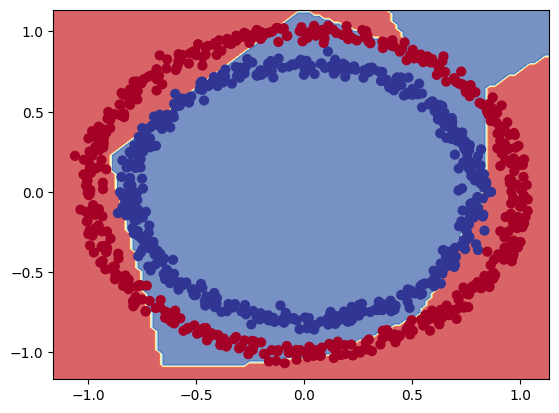

In [29]:
plot_decision_boundary(model_6, x, y)

It seems like our model is the same on in the TensorFlow Playground but model it's still drawing straight lines.

Ideally, the yellow lines go on the inside of the red circle and blue circle.

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? 
 
For binary classification, the output layer activation is usually the Sigmoid activation function.

In [30]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        # output layer, sigmoid activation
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model_7.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

history = model_7.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 835us/step - loss: 0.6923 - accuracy: 0.5170
Epoch 2/100
32/32 [==============================] - 0s 736us/step - loss: 0.6903 - accuracy: 0.5090
Epoch 3/100
32/32 [==============================] - 0s 755us/step - loss: 0.6889 - accuracy: 0.5190
Epoch 4/100
32/32 [==============================] - 0s 711us/step - loss: 0.6879 - accuracy: 0.5200
Epoch 5/100
32/32 [==============================] - 0s 699us/step - loss: 0.6870 - accuracy: 0.5280
Epoch 6/100
32/32 [==============================] - 0s 684us/step - loss: 0.6861 - accuracy: 0.5260
Epoch 7/100
32/32 [==============================] - 0s 698us/step - loss: 0.6852 - accuracy: 0.5380
Epoch 8/100
32/32 [==============================] - 0s 703us/step - loss: 0.6844 - accuracy: 0.5420
Epoch 9/100
32/32 [==============================] - 0s 680us/step - loss: 0.6836 - accuracy: 0.5430
Epoch 10/100
32/32 [==============================] - 0s 685us/step - loss: 0.6828 - accura

It looks like our model is gettings some incredible results, let's check them out.

313/313 [==============================] - 0s 525us/step
doing binary classifcation...


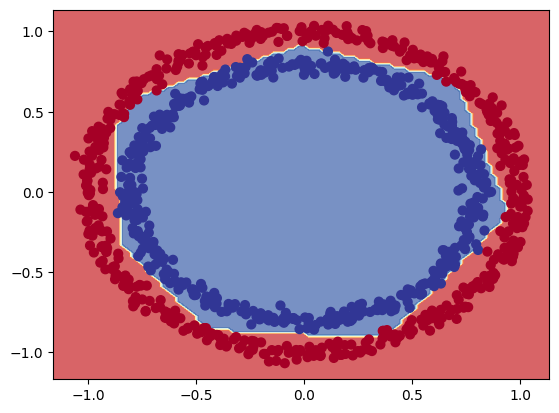

In [31]:
# view the predictions of the model with relu and sigmoid activations

plot_decision_boundary(model_7, x, y)

Looks like our model is almost perfectly (apart from few examples) seperating the two circles.

To get understand activation functions we've just used, let's create them and then try them son some toy data.

In [32]:
# create a toy tensor (similar to the data we pass into our model)

a = tf.cast(tf.range(-10, 10), tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

How does it look?

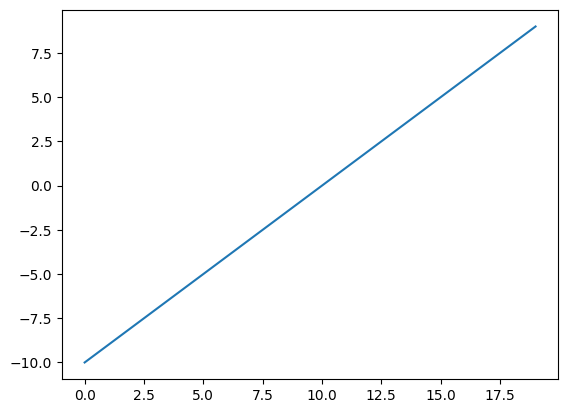

In [33]:
# visualize our toy tensor

plt.plot(a)

A straight (linear) line.

Now let's recreate the sigmoid function and see what it does to our data. 

You can also find a pre-built sigmoid function at 'tf.keras.activations.sigmoid'.

Matematiksel fonksiyonlar kullanarak sigmoid fonksiyonunu kendimiz oluşturuyoruz. Zaten hazır bulunan sigmoid fonksiyonu da kullanılabilir. (tf.keras.activations.sigmoid)

In [34]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))


# use the sigmoid function on our tensor
sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

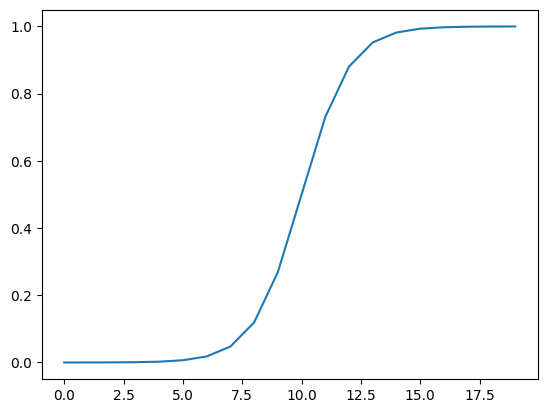

In [35]:
# plot sigmoid modified tensor
plt.plot(sigmoid(a))

A non-straight (non-linear) line.

How about the ReLU function (ReLU turns all negatives to 0 and positive numbers stay the same).

Burda da yine üstteki gibi aynı şekilde ReLU fonskiyonunu kendimiz tanımlayarak oluşturuyoruz.

In [36]:
def relu(x):
    return tf.maximum(0, x)


# pass toy tensor through ReLU function
relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

How does the ReLU-modified tensor look?

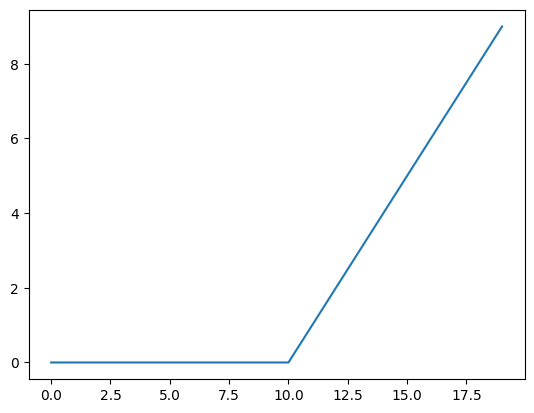

In [37]:
plt.plot(relu(a))

Another non-straight line.

How about TensorFlow's linear activation function?

In [38]:
tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

Inputs are unmodified.

Model doesn't really learn anything when using only linear activation functions, because the linear activation function doesn't change our input data in anyway.

Where as, with our non-linear functions, our data gets manipulated. A neural network uses these kind of transformations at a large scale to figure draw patterns between its inputs and outputs.

